In [1]:
import pickle
import torch
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
samples = []
for i in range(1,10):
    with open(f"logs/job_coff10.0_edge3_swish_128_7_coff10.0_edge3_swish_128_7_swish_128_7/sampling_50_test/sample_ld_50sample_seed{str(i)*4}/samples_all.pkl","rb") as f:
        samples.append(pickle.load(f))

In [4]:
def get_d_vec(pos):
    dm = torch.cdist(pos, pos).triu(1)
    mask = dm != 0
    d_vec = dm[mask]
    return d_vec

def get_dmae(pos, pos_gt):

    dm = torch.cdist(pos, pos).triu(1)
    dm_gt = torch.cdist(pos_gt, pos_gt).triu(1)
    n = len(dm)
    dmae = abs(dm - dm_gt).sum()/(n*(n-1)/2)
    return dmae

def get_pmae(pos, pos_gt):
    dm = torch.cdist(pos, pos).triu(1)
    dm_gt = torch.cdist(pos_gt, pos_gt).triu(1)
    X = (abs(dm - dm_gt)/dm).triu(1)
    n = len(dm)
    dmae = X.sum()/(n*(n-1)/2)
    return pmae

In [5]:
num_data = len(samples[0])
num_seed = len(samples)

d_vec_list = []
dmae_list = []
for i in range(num_data):
    d_vec_ = []
    dmae_ = []
    for s in samples:
        datum = s[i]
        d_vec = get_d_vec(datum.pos_gen[-1])
        d_vec_.append(d_vec)
        dmae = get_dmae(datum.pos_gen[-1], datum.pos)
        dmae_.append(dmae)
    d_vec_list.append(torch.stack(d_vec_))
    dmae_list.append(torch.Tensor(dmae_))
    

In [21]:
dm_list = []
averaged_dmae_list = []
for i in range(num_data):
    mean_dm = []
    for s in samples:
        datum = s[i]
        pos_ = datum.pos_gen[-1]
        dm_ = torch.cdist(pos_, pos_)
        mean_dm.append(dm_)
        pos_gt = datum.pos
    dm = torch.stack(mean_dm).mean(0)
    dm_gt = torch.cdist(pos_gt, pos_gt)
    
    n = len(dm)
    dmae = abs(dm - dm_gt).triu().sum()/(n*(n-1)/2)
    dm_list.append(dm)
    averaged_dmae_list.append(dmae)
    


In [26]:
print(torch.stack(averaged_dmae_list))
print(torch.stack(dmae_list).mean(1))
print(torch.stack(averaged_dmae_list).mean())
print(torch.stack(dmae_list).mean(1).mean())


tensor([0.1691, 0.1833, 0.3095, 0.3235, 0.2692, 0.2757, 0.1542, 0.1839, 0.1950,
        0.1839, 0.2380, 0.1868, 0.1611, 0.1462, 0.1994, 0.2270, 0.2582, 0.1818,
        0.0715, 0.0703, 0.1674, 0.1440, 0.1389, 0.0856, 0.0614, 0.1016, 0.0368,
        0.0361, 0.1437, 0.1683, 0.2011, 0.1790, 0.2862, 0.2333, 0.1991, 0.1515,
        0.0813, 0.0787, 0.1138, 0.0534, 0.1298, 0.1448, 0.4814, 0.4830, 0.0721,
        0.0746, 0.1791, 0.1430, 0.1605, 0.1553])
tensor([0.2302, 0.2180, 0.3642, 0.3757, 0.2722, 0.2776, 0.1771, 0.2074, 0.2275,
        0.2221, 0.2672, 0.2273, 0.1837, 0.1695, 0.2390, 0.2810, 0.2965, 0.2326,
        0.0788, 0.0772, 0.1835, 0.1512, 0.1680, 0.1238, 0.0675, 0.1073, 0.0431,
        0.0442, 0.1699, 0.1999, 0.2386, 0.2193, 0.3451, 0.2875, 0.2412, 0.2021,
        0.0968, 0.0988, 0.1507, 0.1050, 0.1679, 0.1780, 0.5088, 0.4876, 0.0744,
        0.0753, 0.2060, 0.1754, 0.1940, 0.1885])
tensor(0.1734)
tensor(0.2025)


In [28]:
torch.stack(dmae_list).mean(1)

tensor([0.2302, 0.2180, 0.3642, 0.3757, 0.2722, 0.2776, 0.1771, 0.2074, 0.2275,
        0.2221, 0.2672, 0.2273, 0.1837, 0.1695, 0.2390, 0.2810, 0.2965, 0.2326,
        0.0788, 0.0772, 0.1835, 0.1512, 0.1680, 0.1238, 0.0675, 0.1073, 0.0431,
        0.0442, 0.1699, 0.1999, 0.2386, 0.2193, 0.3451, 0.2875, 0.2412, 0.2021,
        0.0968, 0.0988, 0.1507, 0.1050, 0.1679, 0.1780, 0.5088, 0.4876, 0.0744,
        0.0753, 0.2060, 0.1754, 0.1940, 0.1885])

In [7]:
dmae_std = torch.stack(dmae_list).std(1)
print(dmae_std)
print(dmae_std.mean())

tensor([0.0769, 0.0807, 0.0303, 0.0421, 0.0083, 0.0054, 0.0444, 0.0354, 0.0314,
        0.0586, 0.0592, 0.0679, 0.0294, 0.0400, 0.0991, 0.0789, 0.1050, 0.0960,
        0.0294, 0.0279, 0.0443, 0.0697, 0.0936, 0.0840, 0.0403, 0.0495, 0.0113,
        0.0089, 0.0995, 0.1094, 0.0621, 0.0496, 0.0552, 0.0578, 0.0474, 0.0524,
        0.0343, 0.0268, 0.0829, 0.0582, 0.0505, 0.0316, 0.0077, 0.0187, 0.0068,
        0.0046, 0.0388, 0.0516, 0.0268, 0.0668])
tensor(0.0498)


In [8]:
dmae_std.argsort()

tensor([45,  5, 44, 42,  4, 27, 26, 43, 48, 37, 19, 18, 12,  2,  8, 41, 36,  7,
        46, 13, 24,  3, 20,  6, 34, 25, 31, 40, 47, 35, 32, 33, 39,  9, 10, 30,
        49, 11, 21,  0, 15,  1, 38, 23, 22, 17, 14, 28, 16, 29])

tensor(0.0314)


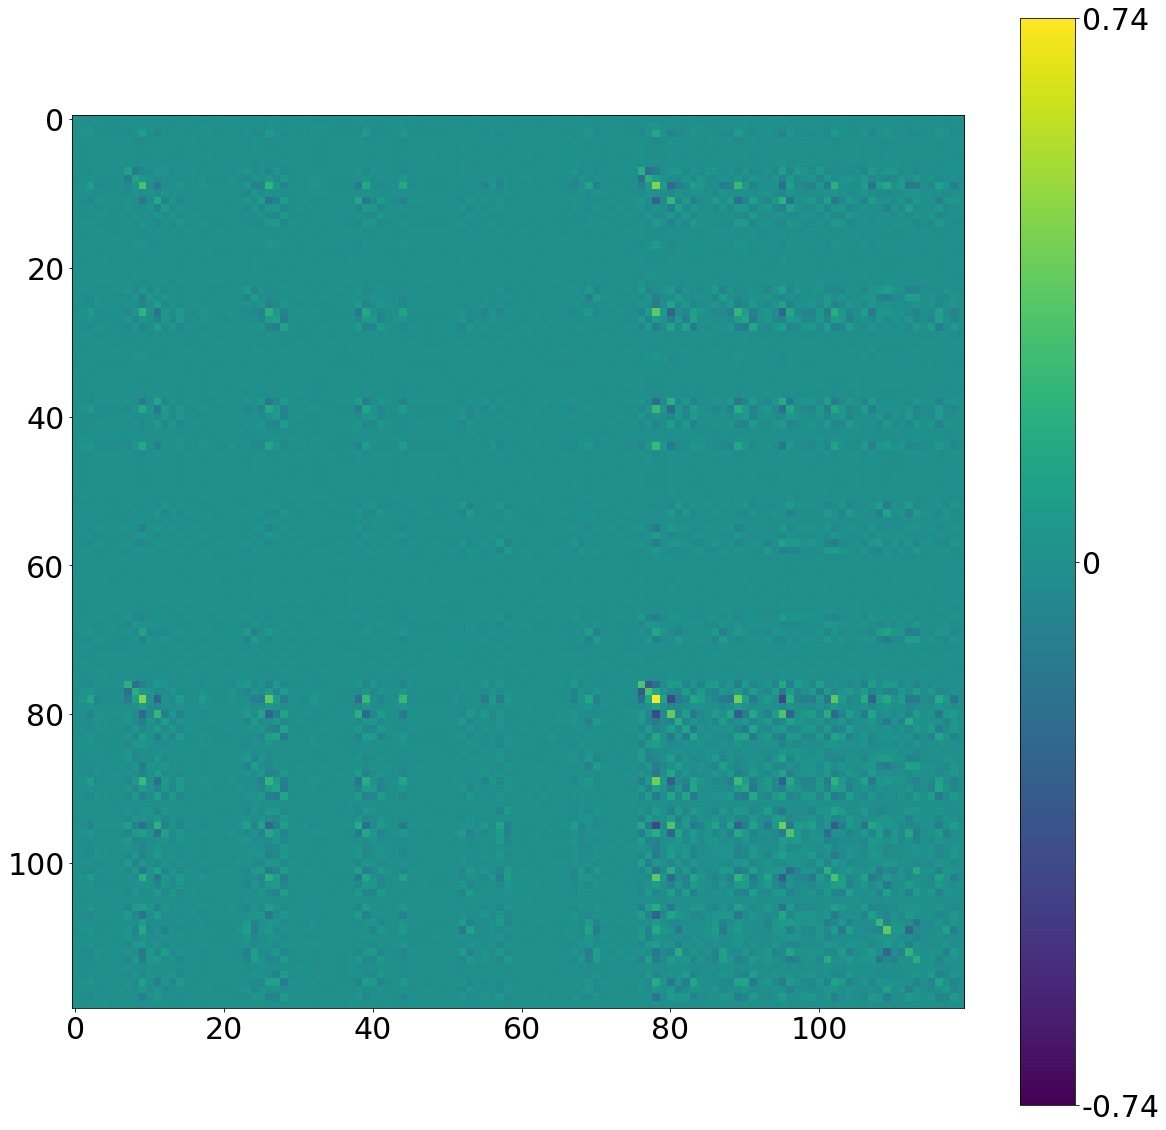

In [20]:
idx = 8
print(dmae_std[idx])
x = d_vec_list[idx].double().numpy()
data = np.cov(x.T)
#data = np.sqrt(abs(data)) * data/abs(data)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ticks_at = [-abs(data).max(), 0, abs(data).max()]
cax = ax.imshow(data, interpolation='nearest', 
                #extent=[0.0, 0.1, 0.0, 0.1],
                vmin=ticks_at[0], vmax=ticks_at[-1])

cbar = fig.colorbar(cax,ticks=ticks_at,format='%1.2g',)
ax.tick_params(axis='both', which='major', labelsize=30)
cbar.ax.tick_params(labelsize=30)

In [63]:
xx = x - x.mean(0)
(xx.unsqueeze(2) * xx.unsqueeze(1)).mean(0).diag()

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [57]:
x.var(0) - ((x - mu) * (x - mu)).mean(0)

tensor([3.8607e-05, 1.5113e-04, 2.0526e-02, 7.8802e-03, 6.1691e-06, 1.8659e-05,
        1.5247e-05, 5.6117e-04, 1.7750e-02, 9.1403e-02, 1.8230e-02, 1.9088e-02,
        5.2095e-06, 5.7086e-04, 1.7331e-04, 1.5038e-04, 5.7719e-05, 8.7819e-05,
        6.2447e-05, 1.6200e-04, 2.0850e-02, 2.4782e-02, 1.0160e-03, 6.6087e-06,
        1.6009e-05, 2.5247e-02, 1.5352e-02, 1.5458e-02, 6.3360e-05, 1.9252e-06,
        2.3818e-05, 6.2720e-06, 4.2659e-05, 7.0676e-05, 1.3686e-02, 6.1033e-02,
        6.6069e-02, 7.4765e-05, 1.6163e-05, 8.5603e-06, 5.2562e-06, 4.9769e-05,
        4.2789e-02, 9.6875e-02, 3.2126e-02, 2.8353e-05, 1.9434e-04, 4.4273e-05,
        1.8079e-04, 2.0050e-05, 9.4093e-06, 1.4765e-05, 5.6616e-02, 8.1028e-02,
        6.6143e-02, 2.0598e-02, 4.9570e-02, 1.9043e-05, 5.5683e-02, 6.0180e-02,
        1.7630e-01, 5.5368e-02, 1.5470e-01, 2.7978e-02, 6.3782e-02, 1.7516e-01,
        6.5749e-02, 4.2042e-02, 6.6234e-05, 3.1915e-04, 2.9310e-04, 1.4630e-04,
        1.4061e-02, 1.4366e-02, 5.4189e-

In [58]:
x = d_vec_list[0]
mu = x.mean(0)
(x - mu).shape

torch.Size([5, 78])

In [6]:

for num_seed in len(samples):
    data = samples[num_seed]
    for d in data:
        pos = d.pos_gen
        torch.cdist(pos)

[Data(atom_type=[13], edge_index=[2, 26], edge_type=[26], num_nodes_per_graph=[1], p_feat=[13, 25], pos=[13, 3], pos_gen=[5000, 13, 3], r_feat=[13, 25], rdmol=[2], smiles="[C:1]([O:2][C:3]([C:4]([O:5][H:13])([H:11])[H:12])([H:9])[H:10])([H:6])([H:7])[H:8]>>[C:1]([O:2][C:3](=[C:4]([H:11])[H:12])[H:10])([H:6])([H:7])[H:8].[O:5]([H:9])[H:13]"),
 Data(atom_type=[13], edge_index=[2, 26], edge_type=[26], num_nodes_per_graph=[1], p_feat=[13, 25], pos=[13, 3], pos_gen=[5000, 13, 3], r_feat=[13, 25], rdmol=[2], smiles="[C:1]([O:2][C:3](=[C:4]([H:11])[H:12])[H:10])([H:6])([H:7])[H:8].[O:5]([H:9])[H:13]>>[C:1]([O:2][C:3]([C:4]([O:5][H:13])([H:11])[H:12])([H:9])[H:10])([H:6])([H:7])[H:8]"),
 Data(atom_type=[16], edge_index=[2, 34], edge_type=[34], num_nodes_per_graph=[1], p_feat=[16, 25], pos=[16, 3], pos_gen=[5000, 16, 3], r_feat=[16, 25], rdmol=[2], smiles="[C:1]1([H:7])([H:8])[C@@:2]2([H:9])[C:3]([H:10])([H:11])[C@:4]1([H:12])[C:5]([H:13])([H:14])[C:6]2([H:15])[H:16]>>[C:1](=[C:4]([C:5]([C:6]([